In [1]:
import numpy as np
import matplotlib.pyplot as plt


def epsilon_constraints(f1, f2, eps):
    points = []
    for indx in range(len(f1)):
        if f2[indx] < eps:
            points.append((f1[indx], f2[indx], indx))
    points.sort(key=lambda x: x[0])
    return points[0] if points else None


f1 = lambda x, y: x - y ** 2 + 1
f2 = lambda x, y: x ** 2 - y ** 2 + 1


In [2]:
# mean = 5
# std = 1
# number_of_points = 20
# number_of_parameters = 2
# D = np.random.normal(mean, std, (number_of_points, number_of_parameters))

D = []
N = 1000

for _ in range(N):
    r, theta = 1, np.random.rand() * 2 * np.pi
    D.append((r * np.cos(theta), r * np.sin(theta)))

D = np.array(D)

x = np.array([v[0] for v in D])
y = np.array([v[1] for v in D])
F1 = f1(x, y)
F2 = f2(x, y)
ideal_x, ideal_y = min(F1), min(F2)



# skalaryzacja przez funkcję liniową


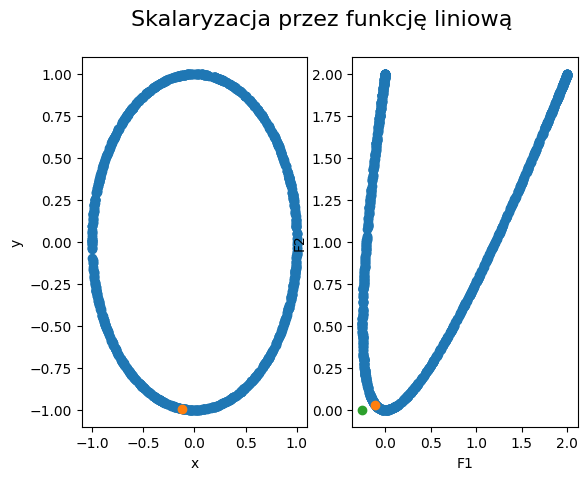

In [3]:

lambda_1 = 0.4
lambda_2 = 0.6
S1 = [lambda_1 * F1[i] + lambda_2 * F2[i] for i in range(N)]
idx1 = S1.index(min(S1))

# wykresy dla skalaryzacji nr.1
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Skalaryzacja przez funkcję liniową', fontsize=16)
ax[0].scatter(x, y)
ax[0].scatter([x[idx1]], [y[idx1]])
ax[0].set_xlabel("x"), ax[0].set_ylabel("y")

ax[1].scatter(F1, F2)
ax[1].scatter([F1[idx1]], [F2[idx1]])
ax[1].scatter([ideal_x], [ideal_y])
ax[1].set_xlabel("F1"), ax[1].set_ylabel("F2")
plt.show()



# skalaryzacja metodą epsilon ograniczeń


(Text(0.5, 0, 'F1'), Text(0, 0.5, 'F2'))

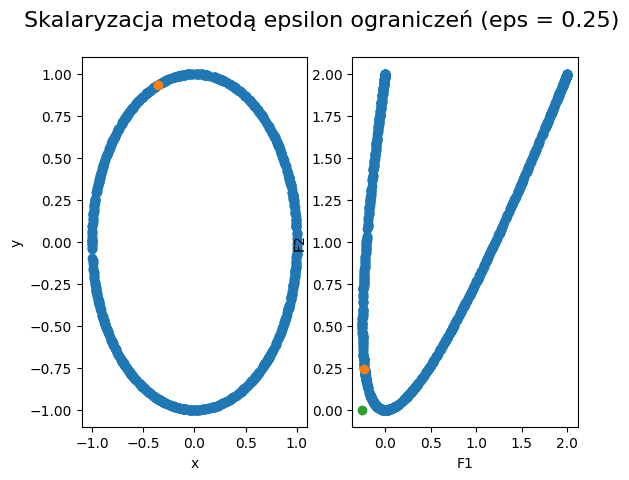

In [4]:

eps = 0.25
point2 = epsilon_constraints(F1, F2, eps)
idx2 = point2[2]


# wykresy dla skalaryzacji nr.2
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Skalaryzacja metodą epsilon ograniczeń (eps = 0.25)', fontsize=16)
ax[0].scatter(x, y)
ax[0].scatter([x[idx2]], [y[idx2]])
ax[0].set_xlabel("x"), ax[0].set_ylabel("y")

ax[1].scatter(F1, F2)
ax[1].scatter([F1[idx2]], [F2[idx2]])
ax[1].scatter([ideal_x], [ideal_y])
ax[1].set_xlabel("F1"), ax[1].set_ylabel("F2")



# skalaryzacja przez minimalizację odległości


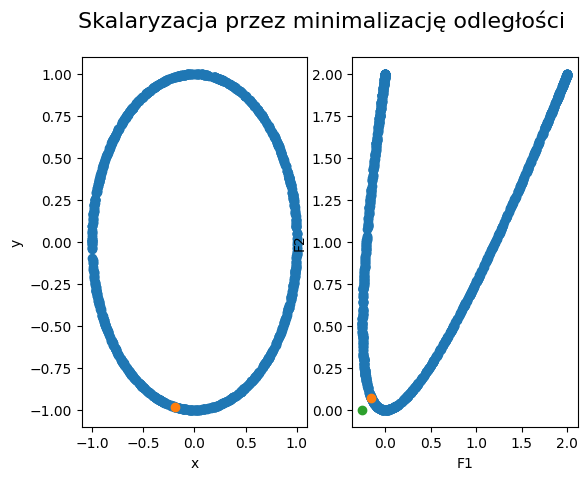

In [5]:

S3 = [(F1[i] - ideal_x) ** 2 + (F2[i] - ideal_y) ** 2 for i in range(N)]
idx3 = S3.index(min(S3))

# wykresy dla skalaryzacji nr.3
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Skalaryzacja przez minimalizację odległości', fontsize=16)
ax[0].scatter(x, y)
ax[0].scatter([x[idx3]], [y[idx3]])
ax[0].set_xlabel("x"), ax[0].set_ylabel("y")

ax[1].scatter(F1, F2)
ax[1].scatter([F1[idx3]], [F2[idx3]])
ax[1].scatter([ideal_x], [ideal_y])
ax[1].set_xlabel("F1"), ax[1].set_ylabel("F2")
plt.show()
